In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sci378 import *

Version:  0.0.18


In [3]:
from lmfit import *

## Peaks fitting

In [7]:
data=pd.read_csv('data/peaks/sample0.csv')
data

,t,y
0,0.203317,4800.0
1,0.206650,5017.0
2,0.209983,5202.0
3,0.213317,5361.0
4,0.216650,5520.0
...,...,...
535,1.986650,21393.0
536,1.989983,21369.0
537,1.993317,21343.0
538,1.996650,21340.0


In [6]:
t=data['t']
y=data['y']

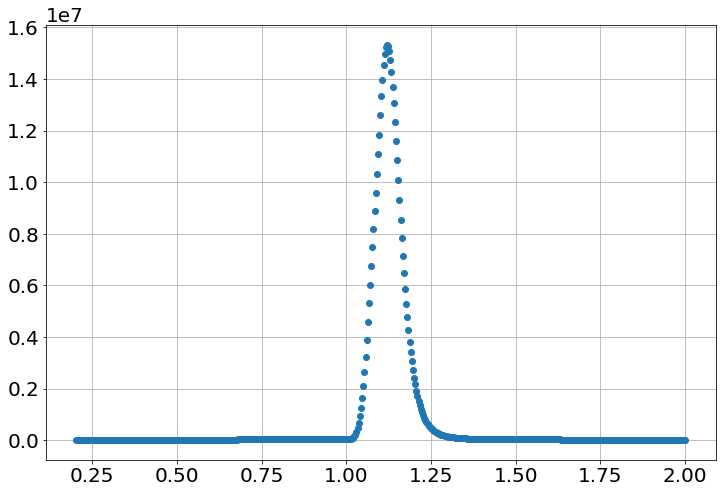

In [8]:
plot(t,y,'o')

In [9]:
model=models.GaussianModel()
model.param_names

['amplitude', 'center', 'sigma']

In [10]:
results=model.fit(y,x=t,amplitude=1e7,center=1,sigma=1)
results

(0.9, 1.3)

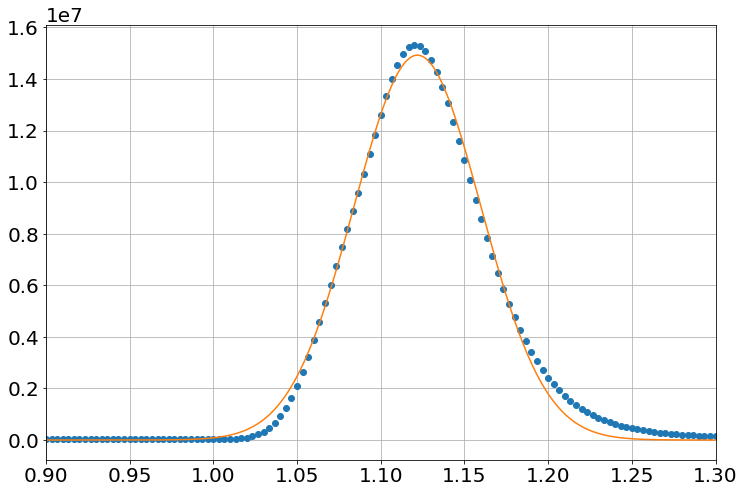

In [11]:
xx=linspace(0,2,2000)
yy=results.eval(x=xx)

plot(t,y,'o')
plot(xx,yy,'-')
xlim([.9,1.3])

In [32]:
def fit_gaussian(filename):
    data=pd.read_csv(filename)
    t=data['t']
    y=data['y']
    
    model=models.GaussianModel()
    results=model.fit(y,x=t,amplitude=1e7,center=1,sigma=1)
    
    return results

(0.9, 1.3)

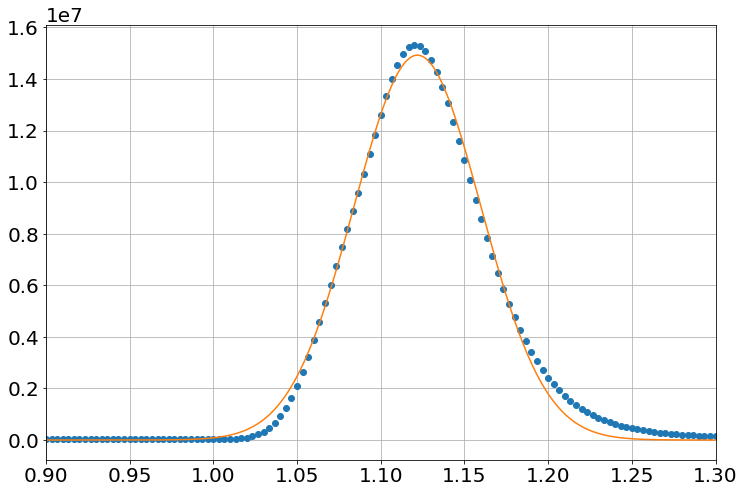

In [33]:
results=fit_gaussian('data/peaks/sample0.csv')
xx=linspace(0,2,2000)
yy=results.eval(x=xx)

plot(t,y,'o')
plot(xx,yy,'-')
xlim([.9,1.3])

In [34]:
from glob import glob
from tqdm import tqdm

In [35]:
filenames=glob('data/peaks/sample*.csv')
S=Storage()
for name in tqdm(filenames):
    results=fit_gaussian(name)
    A=results.params['amplitude'].value
    
    S+=A,
    
A=S.arrays()

100%|█████████████████████████████████████████████████████████████| 423/423 [00:06<00:00, 65.70it/s]


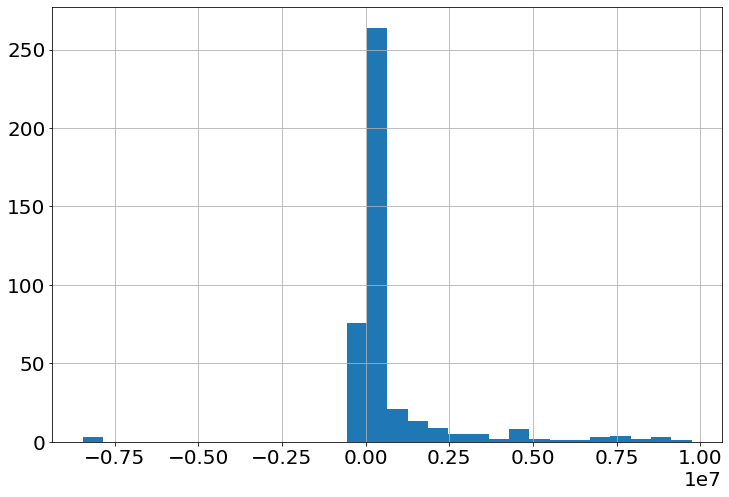

In [39]:
hist(A,30);

In [40]:
def fit_gaussian_fixed(filename):
    data=pd.read_csv(filename)
    t=data['t']
    y=data['y']
    
    model=models.GaussianModel()
    params=model.make_params()
    params['amplitude']=Parameter("amplitude",min=0,value=1e7)

    
    results=model.fit(y,params,x=t,amplitude=1e7,center=1,sigma=1)
    
    return results

100%|█████████████████████████████████████████████████████████████| 423/423 [00:05<00:00, 71.69it/s]


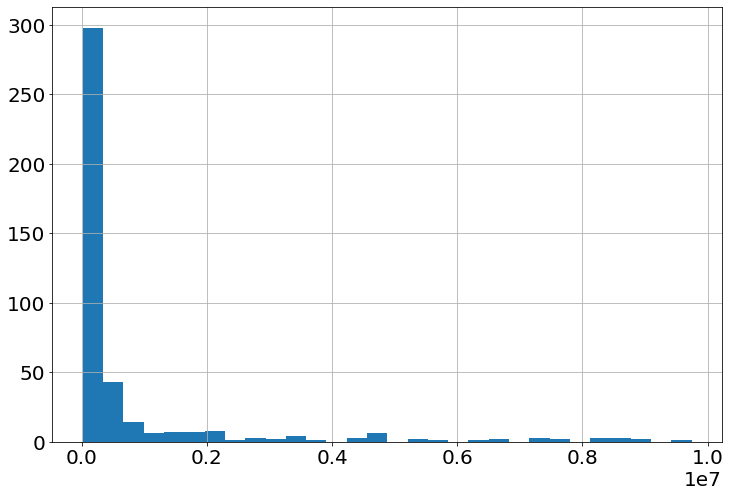

In [41]:
filenames=glob('data/peaks/sample*.csv')
S=Storage()
for name in tqdm(filenames):
    results=fit_gaussian_fixed(name)
    A=results.params['amplitude'].value
    
    S+=A,
    
A=S.arrays()

hist(A,30);

## Logistic function

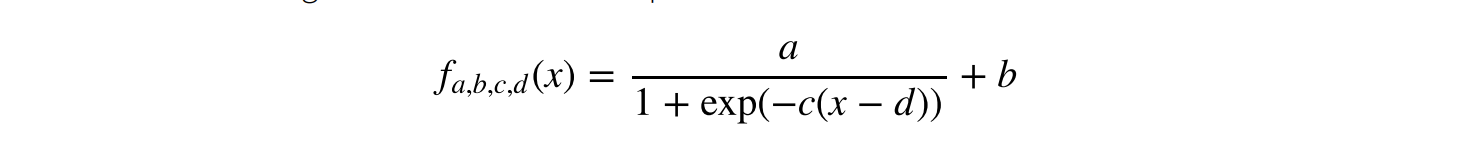

In [42]:
data=pd.read_csv('data/logistic_sample_data/logistic_sample_data_0.csv')
data

,t,y
0,0.000000,-23.457109
1,2.631579,85.591985
2,5.263158,298.678725
3,7.894737,262.557105
4,10.526316,267.429098
5,13.157895,300.568103
6,15.789474,283.661187
7,18.421053,300.665351
8,21.052632,224.524302
9,23.684211,285.753790


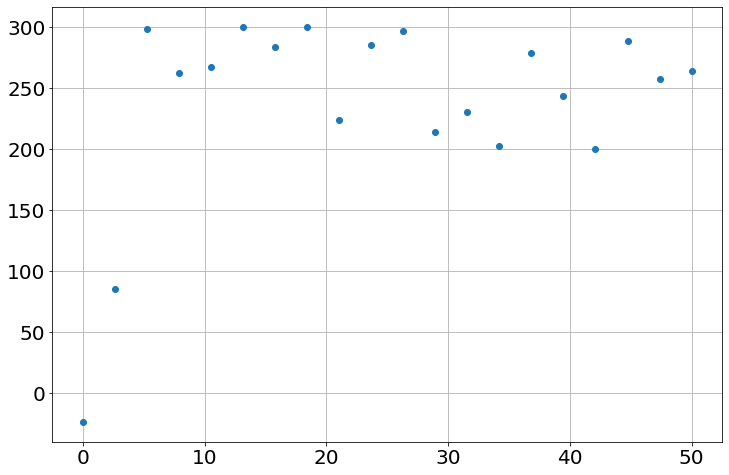

In [44]:
t=data['t']
y=data['y']
plot(t,y,'o')

In [45]:
def f(x,a=1,b=1,c=1,d=1):
    return a/(1+exp(-c*(x-d)))+b

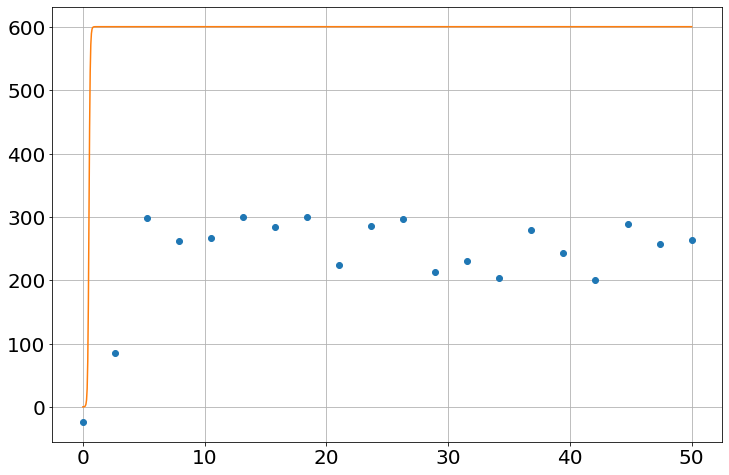

In [46]:
xx=linspace(0,50,1000)
yy=f(xx,a=600,b=0.5,c=20,d=0.5)

plot(t,y,'o')
plot(xx,yy,'-')

In [57]:
mymodel=Model(f)   # from lmfit
params=mymodel.make_params()
params['a']=Parameter("a",min=0,max=1000,value=1)
params['b']=Parameter("b",min=0,max=1000,value=1)
params['c']=Parameter("c",min=0,max=5,value=1)
params['d']=Parameter("d",min=0,max=5,value=1)

In [58]:
result = mymodel.fit(y, params, x=t)

In [59]:
result

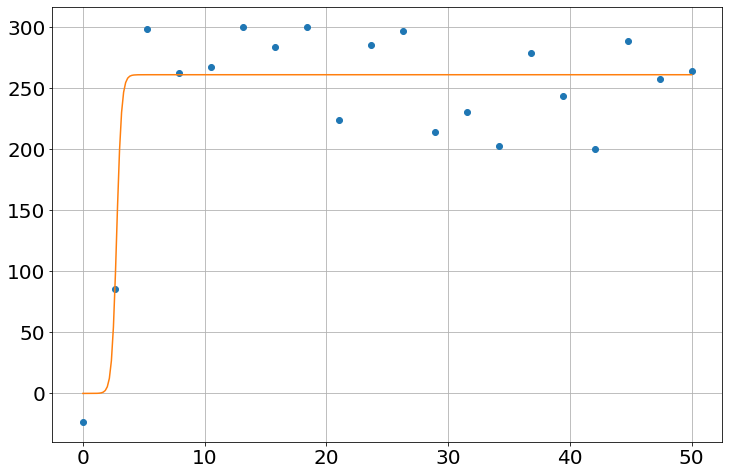

In [61]:
plot(t,y,'o')

tt=linspace(0,50,300)
yy=result.eval(x=tt)
plot(tt,yy,'-')

In [68]:
def fit_logistic(filename,display=False):
    data=pd.read_csv(filename)
    t=data['t']
    y=data['y']
    mymodel=Model(f)   # from lmfit
    params=mymodel.make_params()
    params['a']=Parameter("a",min=0,max=1000,value=1)
    params['b']=Parameter("b",min=0,max=1000,value=1)
    params['c']=Parameter("c",min=0,max=5,value=1)
    params['d']=Parameter("d",min=0,max=5,value=1)

    result = mymodel.fit(y, params, x=t)
    
    if display:
        plot(t,y,'o')
        tt=linspace(0,50,300)
        yy=result.eval(x=tt)
        plot(tt,yy,'-')     
        
        
    return result

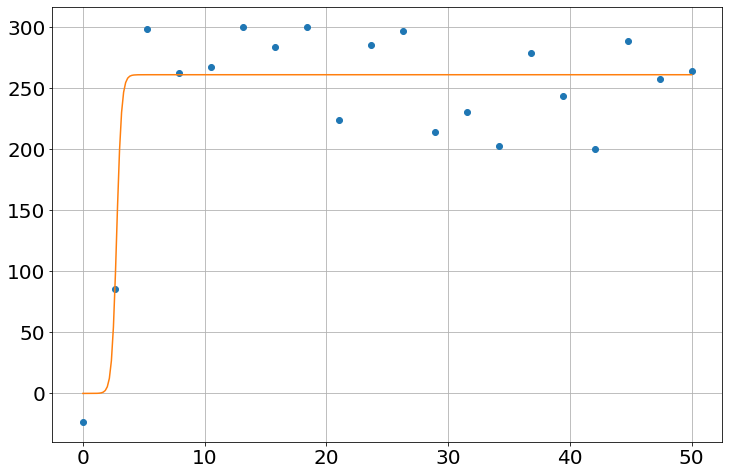

In [69]:
result=fit_logistic('data/logistic_sample_data/logistic_sample_data_0.csv',display=True)

100%|███████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 55.48it/s]


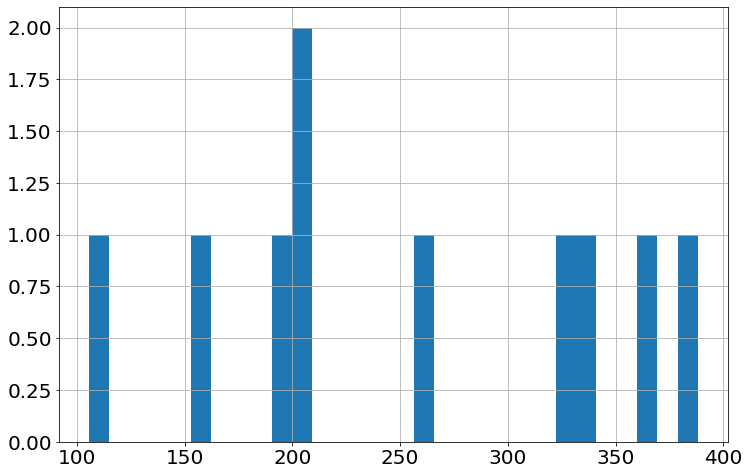

In [71]:
filenames=glob('data/logistic_sample_data/log*.csv')
S=Storage()
for name in tqdm(filenames):
    results=fit_logistic(name)
    K=results.params['a'].value+results.params['b'].value
    
    S+=K,
    
K=S.arrays()

hist(K,30);

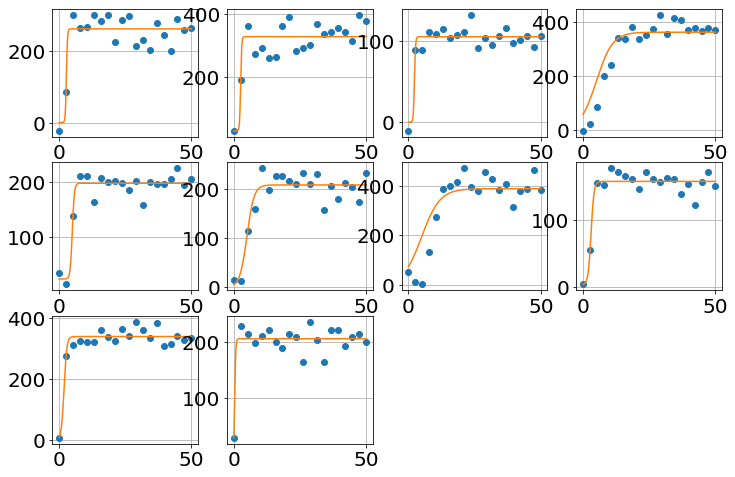

In [72]:
for i,name in enumerate(filenames):
    subplot(3,4,i+1)
    results=fit_logistic(name,display=True)

## population growth

In [4]:
data=pd.read_excel('data/Appendix_ World Population Estimate Sets.xlsx')
data.head()

,"For more information on sources, visit:",Unnamed: 1,Unnamed: 2,Unnamed: 3,scottmanning.com,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Year,Leage of Nations,NaN,Taeuber 1949,16.0,Cook 1960,17.0,Durand 1967,18.0,Clark 1968,...,Trager 1994,23.0,Livi-Bacci\n2001,24.0,UN Pop\nDivision 2006,25.0,U.S. Census\nBureau 2007,26.0,Time,population
2,"10,000 B.C.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,6000000,NaN,NaN,NaN,NaN,NaN,-10000,5000000
3,"8,000 B.C.",NaN,NaN,NaN,NaN,NaN,NaN,5000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-8000,5000000
4,"5,000 B.C.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5000,5000000


In [5]:
data=pd.read_excel('data/Appendix_ World Population Estimate Sets.xlsx',skiprows=2)
data.head()

,Year,Leage of Nations,Unnamed: 2,Taeuber 1949,16,Cook 1960,17,Durand 1967,18,Clark 1968,...,Trager 1994,23,Livi-Bacci\n2001,24,UN Pop\nDivision 2006,25,U.S. Census\nBureau 2007,26,Time,population
0,"10,000 B.C.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,6000000.0,NaN,NaN,NaN,NaN,NaN,-10000.0,5000000.0
1,"8,000 B.C.",NaN,NaN,NaN,NaN,NaN,NaN,5000000.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-8000.0,5000000.0
2,"5,000 B.C.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5000.0,5000000.0
3,"4,000 B.C.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4000.0,7000000.0
4,"3,000 B.C.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3000.0,14000000.0


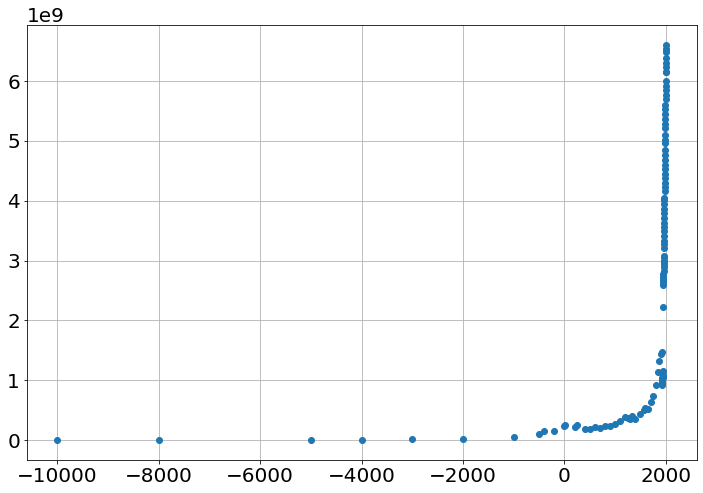

In [6]:
t=data['Time']
y=data['population']
plot(t,y,'o')

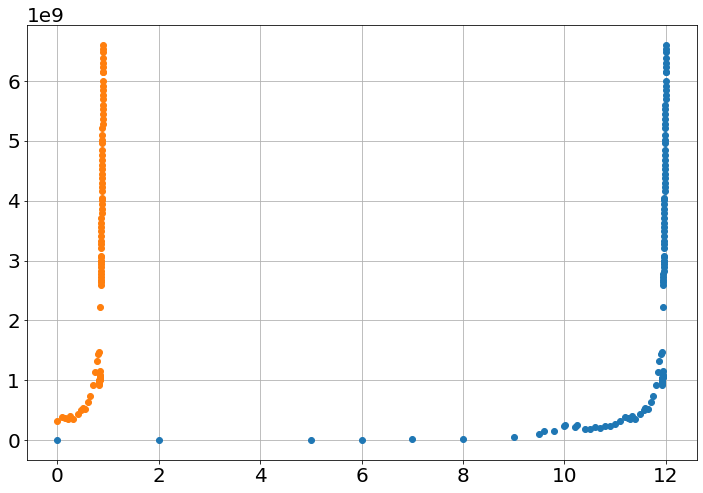

In [27]:
# make -10000 = t=0
# scale, so that the time is in millenia rather than years
t=(data['Time'].dropna()-(-10000))/1000
y=data['population'].dropna()
plot(t,y,'o')

y=array(y[t>11])
t=array(t[t>11])
t=t-min(t)
plot(t,y,'o')

In [28]:
y

array([3.20000000e+08, 3.82000000e+08, 3.75000000e+08, 3.60000000e+08,
       4.10000000e+08, 3.62500000e+08, 4.35000000e+08, 5.00000000e+08,
       5.40333333e+08, 5.21200000e+08, 6.34666667e+08, 7.45333333e+08,
       9.25600000e+08, 1.14566667e+09, 1.32500000e+09, 1.43787508e+09,
       9.30000372e+08, 1.47651250e+09, 9.63357501e+08, 9.74263002e+08,
       9.81000002e+08, 9.96250002e+08, 1.00640000e+09, 1.01225000e+09,
       1.02080000e+09, 1.02890000e+09, 1.03850000e+09, 1.04750001e+09,
       1.05790001e+09, 1.06280001e+09, 1.07260001e+09, 1.08500001e+09,
       1.15000044e+09, 2.22740142e+09, 2.59428622e+09, 2.63632757e+09,
       2.68164530e+09, 2.72959137e+09, 2.77588786e+09, 2.83396217e+09,
       2.88976854e+09, 2.94625365e+09, 2.99856660e+09, 2.99751603e+09,
       3.08135791e+09, 3.05777002e+09, 3.20678455e+09, 3.27785733e+09,
       3.32351905e+09, 3.41691566e+09, 3.48655455e+09, 3.55829634e+09,
       3.63282086e+09, 3.70329740e+09, 3.78525139e+09, 3.86130385e+09,
      

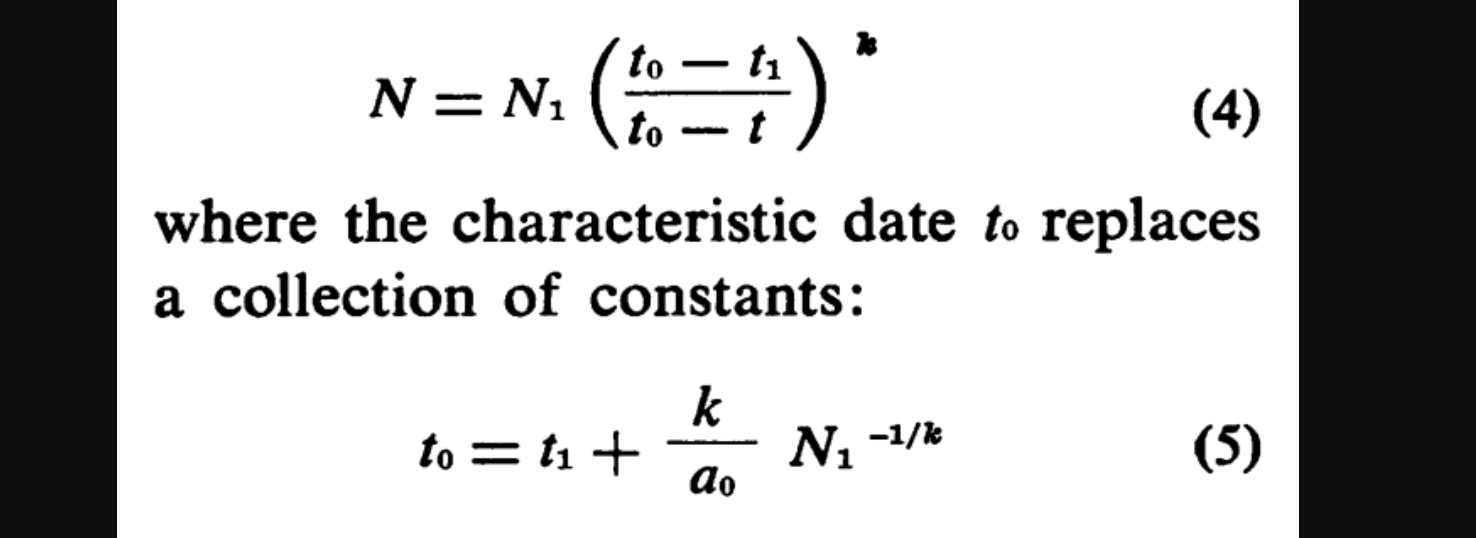

In [37]:
def N(x,k,to,N1,t1):
    values=N1*((to-t1)/(to-x))**k
    return values


mymodel=Model(N)   # from lmfit
params=mymodel.make_params()
params

name,value,initial value,min,max,vary
k,-inf,None,-inf,inf,True
to,-inf,None,-inf,inf,True
N1,-inf,None,-inf,inf,True
t1,-inf,None,-inf,inf,True


In [46]:
params['to']=Parameter("to",min=max(t)+1e-4,max=1000,value=max(t)+50)
params['k']=Parameter("k",min=0,max=200,value=.1)
params['N1']=Parameter("N1",value=y[0],vary=False)
params['t1']=Parameter("t1",value=t[0],vary=False)
params

name,value,initial value,min,max,vary
k,0.10000000,0.1,0.00000000,200.000000,True
to,50.9070000,50.907,0.90710000,1000.00000,True
N1,3.2000e+08,320000000.0,-inf,inf,False
t1,0.00000000,0.0,-inf,inf,False


In [47]:
result = mymodel.fit(y, params, x=t)

In [48]:
result

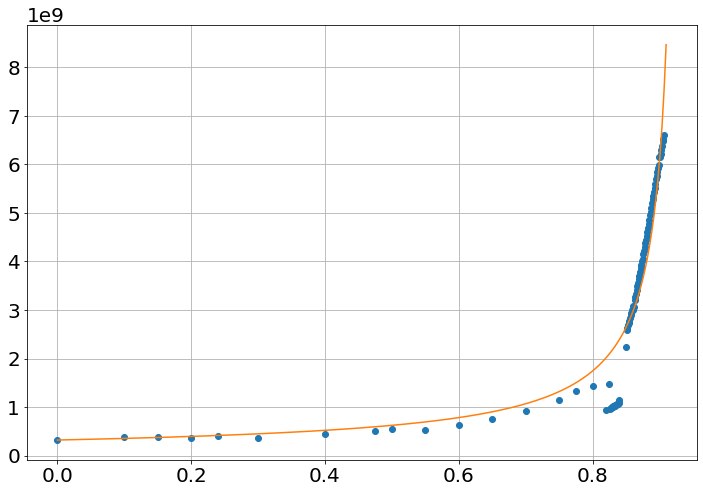

In [54]:
plot(t,y,'o')
tt=linspace(0,0.91,300)
yy=result.eval(x=tt)
plot(tt,yy,'-')     



## Novik-Weiner Data

In [68]:
data=pd.read_csv('data/g149novickA.txt')
data

,0.1699,0.019
0,0.4426,0.0855
1,0.5111,0.1164
2,0.7156,0.1639
3,1.0564,0.2470
4,1.2041,0.2803
5,1.4311,0.3278
6,1.6465,0.3563
7,1.8283,0.4038
8,2.1119,0.4537
9,2.4182,0.5059


In [65]:
data=pd.read_csv('data/g149novickA.txt',header=None)
data

,0,1
0,0.1699,0.0190
1,0.4426,0.0855
2,0.5111,0.1164
3,0.7156,0.1639
4,1.0564,0.2470
5,1.2041,0.2803
6,1.4311,0.3278
7,1.6465,0.3563
8,1.8283,0.4038
9,2.1119,0.4537


In [66]:
t=data[0]
z=data[1]

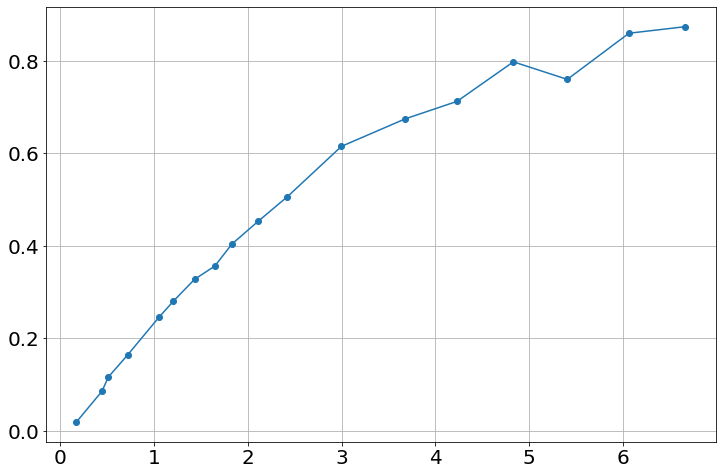

In [67]:
plot(t,z,'-o')

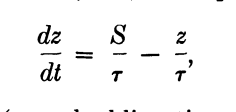

In [71]:
from pyndamics3 import Simulation
from pyndamics3.fit import fit, Parameter

pyndamics3  version  0.0.29


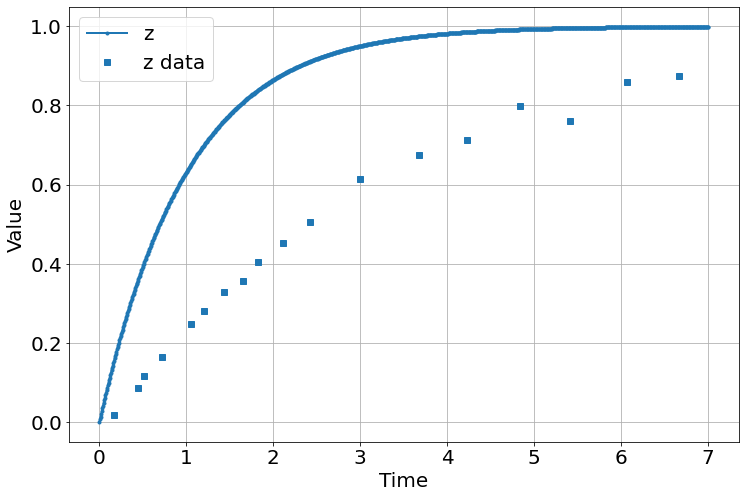

<Figure size 864x576 with 0 Axes>

In [73]:
sim=Simulation()
sim.add("z' = S/τ - z/τ",0,plot=True)
sim.params(S=1,τ=1)
sim.add_data(t=t,z=z,plot=True)
sim.run(7)

In [74]:
sim=Simulation()
sim.add("z' = S/τ - z/τ",0,plot=False)
sim.params(S=1,τ=1)
sim.add_data(t=t,z=z,plot=False)
sim.run(7)

In [75]:
results=fit(sim,
           Parameter("S",value=1,min=0),
           Parameter("τ",value=1,min=0),
           )

In [76]:
results

In [77]:
sim.run(7)

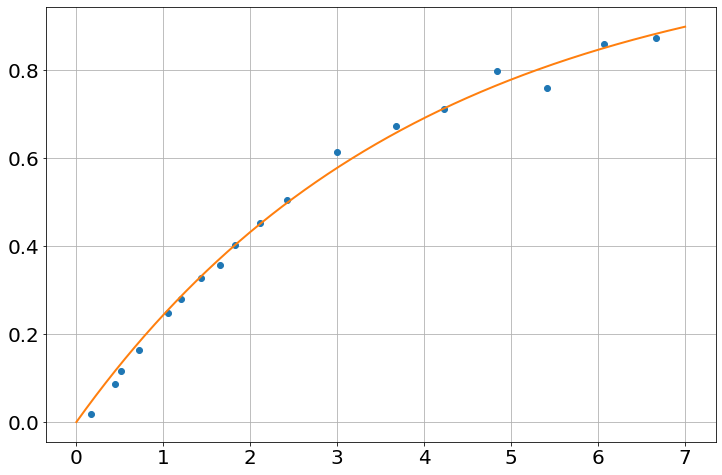

In [78]:
plot(t,z,'o')
plot(sim.t,sim.z)